# Data Science and Business Analytics internship at The Sparks Foundation  #GRIPOCTOBER21

## Task 2 : Prediction using Unsupervised Machine Learning

## Problem Statement : From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

### Author : Vivek Vishwanath Patil 

#### Step 1 : Importing libraries 

In [3]:
import pandas as pd
import matplotlib.pyplot as mpl
from sklearn import preprocessing
from sklearn.cluster import KMeans
import seaborn as sbn

#### Step 2 : Reading Data

In [4]:
dataset = pd.read_csv('Iris.csv')

In [5]:
dataset.drop('Id',axis=1,inplace=True)

In [6]:
dataset.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
dataset['Species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
X= dataset.drop('Species',axis=1) 

In [10]:
# species data
y = dataset['Species'] 

In [11]:
#displaying X data 
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [12]:
# Displaying y data 
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

#### Step 3 : Plotting the data

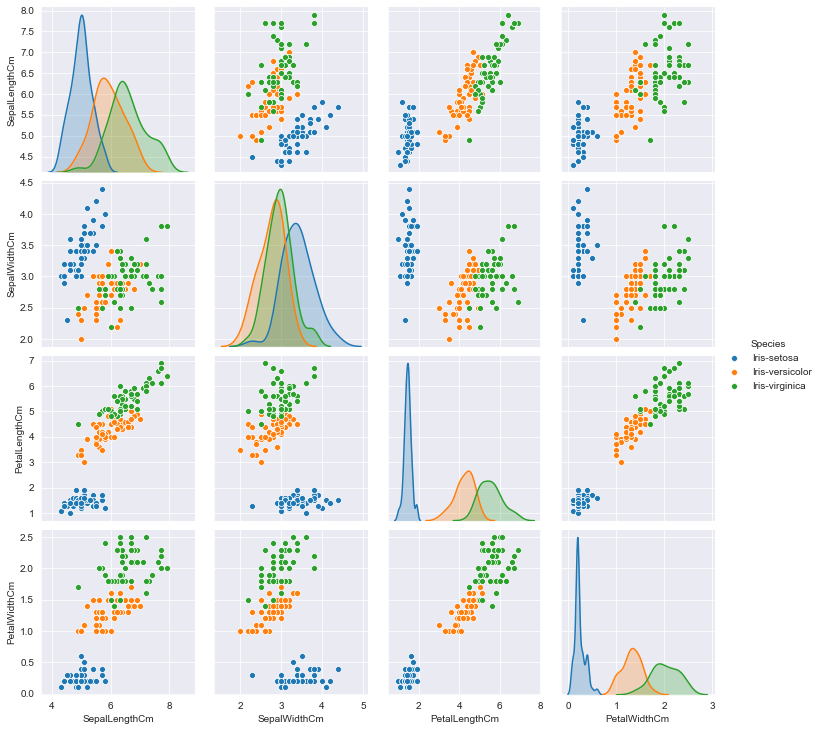

In [28]:
sbn.pairplot(data = dataset ,hue = 'Species')

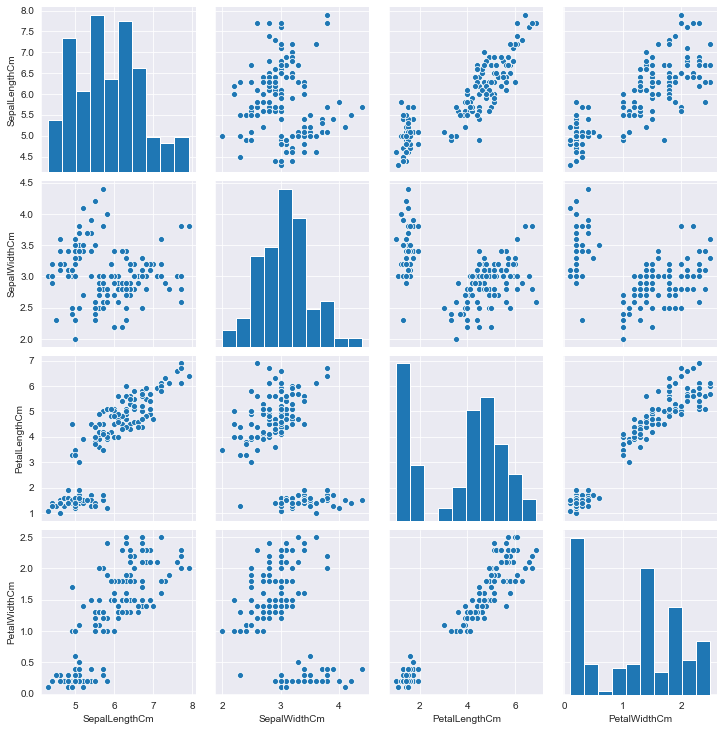

In [24]:
sbn.pairplot(data=X)

#### Step 4 : Scaling data 

In [37]:
X_scaled = preprocessing.scale(X)
X_scaled[:10]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673],
       [-0.53717756,  1.95766909, -1.17067529, -1.05003079],
       [-1.50652052,  0.80065426, -1.3412724 , -1.18150376],
       [-1.02184904,  0.80065426, -1.2844067 , -1.31297673],
       [-1.74885626, -0.35636057, -1.3412724 , -1.31297673],
       [-1.14301691,  0.10644536, -1.2844067 , -1.4444497 ]])

#### Step 5 : figuring out the right number of clusters using Within-Cluster-Sum-of-Squares (WCSS)

In [38]:
wcss=[]
cl = 10

for i in range(1,cl):
    kmeans = KMeans(i)
    kmeans.fit(X_scaled)
    x = kmeans.inertia_
    wcss.append(x)
wcss

[600.0000000000003,
 223.73200573676343,
 140.96581663074699,
 114.42970777082239,
 91.07563926881433,
 80.48982145270772,
 72.1993057139817,
 63.269874280276845,
 55.03383208484751]

#### Step 6 : Using The Elbow Method to find optimal value of clusters

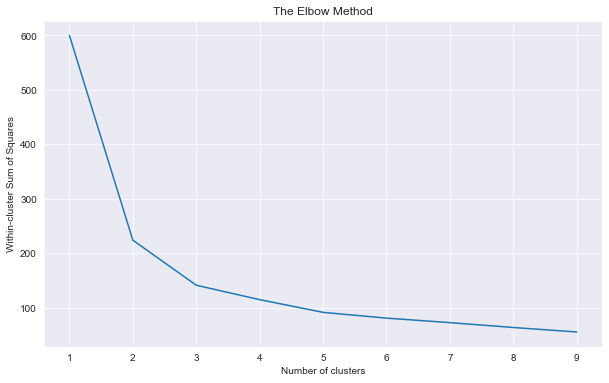

In [39]:
mpl.figure(figsize=(10,6))
num_cl = range(1,cl)
mpl.plot(num_cl,wcss)
mpl.title('The Elbow Method')
mpl.xlabel('Number of clusters')
mpl.ylabel('Within-cluster Sum of Squares');

#### Step 7 : Applying K-Means

In [47]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

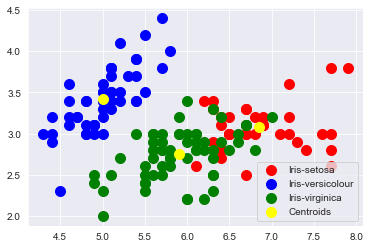

In [49]:
# Visualising the clusters - On the first two columns
mpl.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
mpl.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
mpl.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
mpl.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

mpl.legend()